# Bài 1:
Cho bài toán XOR:\
Implement thuật toán neural network để giải bài toán dùng Pytorch

In [1]:
import torch
import torch.nn as nn

In [18]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Tạo dữ liệu đầu vào và đầu ra cho bài toán XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Định nghĩa một mạng neural network đơn giản
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Tầng ẩn
        self.fc2 = nn.Linear(2, 1)  # Tầng đầu ra

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Khởi tạo mô hình và hàm mất mát
model = XORModel()
criterion = nn.BCELoss()  # Hàm mất mát binary cross entropy

# Sử dụng optimizer (ví dụ: Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}')

# Kiểm thử mô hình
with torch.no_grad():
    test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test_data)
    print(predicted)

# Output sẽ cho kết quả xấp xỉ [0], [1], [1], [0]

Epoch [1000/10000], Loss: 0.6931
Epoch [2000/10000], Loss: 0.6931
Epoch [3000/10000], Loss: 0.6929
Epoch [4000/10000], Loss: 0.6926
Epoch [5000/10000], Loss: 0.6912
Epoch [6000/10000], Loss: 0.6822
Epoch [7000/10000], Loss: 0.6259
Epoch [8000/10000], Loss: 0.5097
Epoch [9000/10000], Loss: 0.2719
Epoch [10000/10000], Loss: 0.0978
tensor([[0.0783],
        [0.9118],
        [0.9116],
        [0.1170]])


# Bài 2:
Cho dataset MNIST\
Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch\
Chỉnh learning rate, vẽ đồ thị loss tương ứng.\
Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.

In [11]:
#Chuẩn bị dữ liệu MNIST và chia thành tập train/test:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

#Xây dựng mạng neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()

#Chọn hàm loss và optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

#Huấn luyện mô hình:
n_epochs = 10
losses = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss / len(train_loader))

    print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {running_loss / len(train_loader)}')

Epoch [1/10], Loss: 1.0178477889470963
Epoch [2/10], Loss: 0.3868465848854864
Epoch [3/10], Loss: 0.3274838478644011
Epoch [4/10], Loss: 0.2949403242738262
Epoch [5/10], Loss: 0.2712761698795089
Epoch [6/10], Loss: 0.24955730986938293
Epoch [7/10], Loss: 0.230514229042952
Epoch [8/10], Loss: 0.2126153130044561
Epoch [9/10], Loss: 0.19785904468916882
Epoch [10/10], Loss: 0.18422457478098522


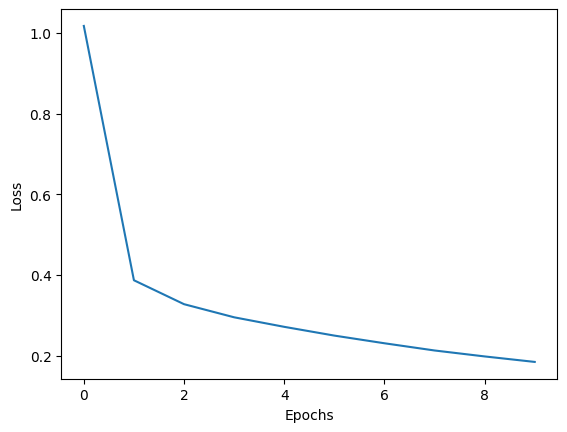

In [12]:
#Vẽ đồ thị loss:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [30]:
# Tính toán các chỉ số MSE, RSME, MAE, MAPE trên tập test
test_mse = 0
test_rmse = 0
test_mae = 0
test_mape = 0

# Lặp qua từng batch dữ liệu trong tập test
for images, labels in test_loader:
    # Truyền dữ liệu vào mô hình
    outputs = model(images)

    # Tính toán các chỉ số khác
    _, predicted = torch.max(outputs.data, 1)
    diff = predicted - labels
    test_mse += torch.sum(diff ** 2)
    test_rmse = torch.sqrt(test_mse / len(test_loader))
    test_mae = torch.sum(torch.abs(diff))
    test_mape = torch.sum(diff / labels)

print("Test MSE: {}".format(test_mse / len(test_loader)))
print("Test RMSE: {}".format(test_rmse))
print("Test MAE: {}".format(test_mae))
print("Test MAPE: {}".format(test_mape))


Test MSE: 59.917198181152344
Test RMSE: 7.740620136260986
Test MAE: 0
Test MAPE: nan


# Bài 3:
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4

- Hàm softmax được sử dụng trong machine learning và deep learning để chuyển đổi đầu ra của một mô hình thành một phân phối xác suất. Nó đảm bảo rằng tổng các xác suất đầu ra luôn bằng 1, giúp chúng ta có thể tạo ra một dự đoán xác suất có ý nghĩa.

- Hàm softmax sử dụng exponential function (e) bởi vì nó có một số tính chất quan trọng khiến nó thích hợp cho việc tạo ra phân phối xác suất. Dưới đây là một số lý do:

  + Chuyển đổi thành xác suất: Exponential function (e) có tính chất duy nhất, khiến cho kết quả luôn là một số dương và không bao giờ âm hoặc bằng 0. Điều này đảm bảo rằng mỗi phần tử trong phân phối xác suất sau khi áp dụng softmax đều dương, và tổng của chúng bằng 1.
  
  + Tính chất mượt (smoothness): Exponential function tăng rất nhanh khi x tiến tới dương. Điều này có thể giúp mô hình tập trung nhiều vào một lớp hoặc nhóm lớp cụ thể, trong khi cũng cho phép một ít sự "phân tán" đến các lớp khác.
  
  + Đạo hàm dễ tính toán: Exponential function (e) có đạo hàm dễ tính toán và cực kỳ hữu ích trong quá trình huấn luyện mô hình sử dụng phương pháp lan truyền ngược (backpropagation). Điều này giúp cho việc điều chỉnh các trọng số trong mô hình trở nên hiệu quả.
  
  + Quan hệ với phân phối Gaussian (chuẩn): Exponential function liên quan mật thiết với phân phối Gaussian (chuẩn) thông qua biểu thức softmax, giúp tạo ra một sự kết nối quan trọng với các khái niệm thống kê.

=> Tóm lại, exponential function (e) được sử dụng trong hàm softmax bởi vì nó mang lại nhiều tính chất quan trọng giúp đảm bảo tính chất xác suất và dễ quản lý trong quá trình huấn luyện mô hình.